In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
#读取数据，处理数据
data = pd.read_csv("D:\桌面\Train.csv")
#把shares大于10000的都删除.占比<5%
rows_to_drop = data[data[' shares'] > 10000].index
df = data.drop(rows_to_drop)
#手动降维
df = df.drop([" n_non_stop_words"," weekday_is_monday"," weekday_is_tuesday"," weekday_is_wednesday"," weekday_is_thursday"," weekday_is_friday"
                ," weekday_is_saturday"," weekday_is_sunday"], axis=1)

In [7]:
# 将训练数据和测试数据分开
X = df.iloc[:, :-1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = df.iloc[:, -1]


In [8]:
# 卡方检验特征选择和PCA特征提取
result=[]
for i in range(1,41):
    skb = SelectKBest(chi2, k=i)
    X_pca = skb.fit_transform(X_scaled, y)
    # 训练模型并进行十折交叉验证
    n_splits = 10
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    mae_list = []
    rmse_list = []
    mape_list = []
    for train_index, test_index in kf.split(X_pca):
        X_train, X_test = X_pca[train_index], X_pca[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #把y值分为两类来进行预测
        y_binary = np.where(y_train > 1500,1,0)
        lr_model = LogisticRegression(max_iter=200)
        lr_model.fit(X_train, y_binary)
        #把预测值映射回去
        y_pred = lr_model.predict(X_test)
        print(y_pred.mean())
        y_pred= np.where(y_pred > 0, 100*12, 100*9)
        mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
    result.append(np.mean(mape_list))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.6119177253478524
0.5977011494252874
0.5972768532526475
0.6024205748865356
0.6114977307110439
0.6063540090771559
0.6124054462934947
0.6187594553706506
0.6051437216338881
0.6024205748865356
0.08439201451905626
0.07320024198427103
0.08623298033282904
0.07715582450832073
0.08260211800302572
0.0735249621785174
0.07170953101361574
0.08350983358547655
0.08411497730711044
0.07866868381240545
0.1336963097398669
0.12613430127041741
0.1400907715582451
0.13161875945537066
0.1313161875945537
0.12193645990922844
0.12465960665658093
0.13313161875945537
0.13071104387291982
0.12950075642965203
0.29219600725952816
0.2924984875983061
0.30196671709531014
0.30136157337367625
0.2968229954614221
0.2901664145234493
0.2989409984871407
0.3046898638426626
0.28895612708018154
0.2956127080181543
0.29219600725952816
0.2924984875983061
0.30196671709531014
0.30136157337367625
0.2968229954614221
0.2901664145234493
0.2989409984871407
0.3046898638426626
0.28895612708018154
0.295

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3285930408472012
0.3216338880484115
0.32344931921331316
0.32223903177004537
0.3125567322239032


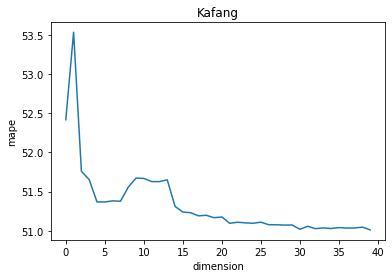

In [31]:
plt.ylabel("mape")
plt.xlabel("dimension")
plt.title("Kafang")
plt.plot(range(len(result)),result);

In [30]:
min(result)

51.01095082308927

In [11]:
# 卡方检验特征选择和PCA特征提取
resul=[]
for i in range(1,41):
    print(i)
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_scaled)
    X_pca = scaler.fit_transform(X_pca)
    # 训练模型并进行十折交叉验证
    n_splits = 10
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    mae_list = []
    rmse_list = []
    mape_list = []
    for train_index, test_index in kf.split(X_pca):
        X_train, X_test = X_pca[train_index], X_pca[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #把y值分为两类来进行预测
        y_binary = np.where(y_train > 1500,1,0)
        lr_model = LogisticRegression(max_iter=200)
        lr_model.fit(X_train, y_binary)
        #把预测值映射回去
        y_pred = lr_model.predict(X_test)
        y_pred= np.where(y_pred > 0, 100*12, 100*9)
        mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
    resul.append(np.mean(mape_list))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


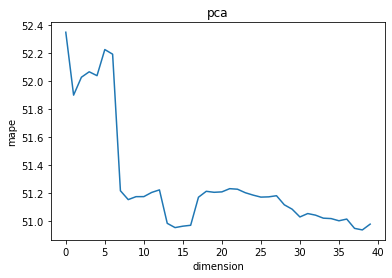

In [32]:
plt.plot(range(len(resul)),resul)
plt.ylabel("mape")
plt.title("pca")
plt.xlabel("dimension");

In [25]:
# 找到最小MAPE值对应的索引
min_index = np.argmin(resul)
print(resul[min_index])


50.93585955393827


In [49]:
resul[14]

50.95246774928771

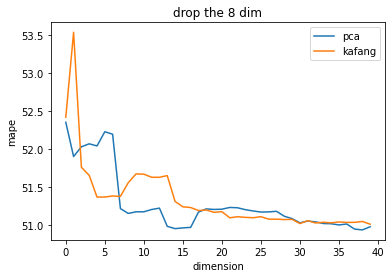

In [33]:
plt.plot(range(len(resul)),resul,label="pca")
plt.plot(range(len(result)),result,label='kafang')
plt.legend()
plt.title("drop the 8 dim")
plt.ylabel("mape")
plt.xlabel("dimension");

In [48]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_scaled)
X_pca = scaler.fit_transform(X_pca)
mmm=1000
ii=0
jj=0
kk=0
# 训练模型并进行十折交叉验证
for i in range(10,20):
    for j in range(11,18):
        for k in range(6,10):
            kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
            mae_list = []
            rmse_list = []
            mape_list = []
            for train_index, test_index in kf.split(X_pca):
                X_train, X_test = X_pca[train_index], X_pca[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                #把y值分为两类来进行预测
                y_binary = np.where(y_train > 100*i,1,0)
                lr_model = LogisticRegression(max_iter=200)
                lr_model.fit(X_train, y_binary)
                #把预测值映射回去
                y_pred = lr_model.predict(X_test)
                y_pred= np.where(y_pred > 0, 100*j, 100*k)
                mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
            ji=np.mean(mape_list)
            if ji<mmm:
                mmm=ji
                ii=i
                jj=j
                kk=k
print(mmm,ii,jj,kk)

50.87357738220809 15 12 8


In [50]:
#那就pca降维 15 12 8了